In [1]:
# Quantum SVM for allowing support vector machienes to be ported to quantum Computers
import qiskit

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data#dataset
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

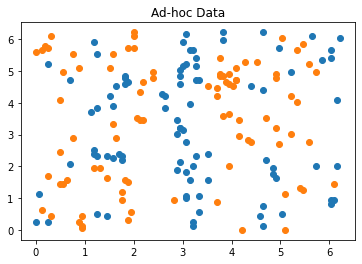

{'A': 0, 'B': 1}


In [3]:
feature_dim, training_dataset_size, testing_dataset_size, random_seed, shot  = 2, 90, 10, 10598, 10000

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size, test_size=testing_dataset_size,gap=0.3, n=feature_dim, plot_data=True)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots=shot, seed_simulator=random_seed, seed_transpiler=random_seed)
result = svm.run(quantum_instance)